In [1]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

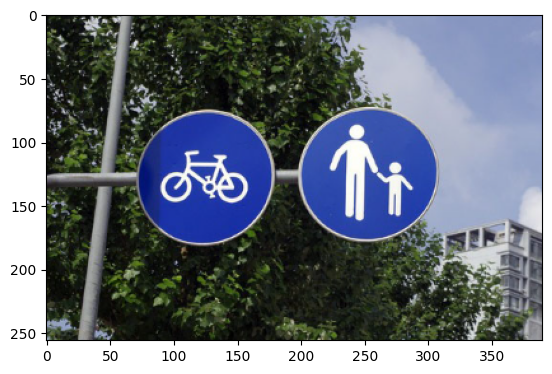

In [23]:
I = plt.imread('test_sobel.png')
plt.imshow(I)

In [12]:
if I.ndim == 3:
    I = np.dot(I[...,:3],[0.2989,0.587,0.114])


In [16]:
Gx = np.array([[-1,0,1],
                [-2,0,0],
                [-1,0,1]])

Gy = np.array([[-1,-2,-1],
               [0,0,0],
               [1,2,1]])

In [19]:
def convolved2d(image,kernel):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    output_height = image_height - kernel_height + 1
    output_width = image_width - kernel_width + 1

    output = np.zeros((output_height,output_width))

    for i in range(output_height):
        for j in range(output_width):
            output[i,j] = np.sum(image[i:i+kernel_height,j:j+kernel_width]*kernel)

    return output    

In [20]:
Ix = convolved2d(I,Gx)
Iy = convolved2d(I,Gy)

In [21]:
G = np.hypot(Ix,Iy)
G = (G/G.max()) * 255

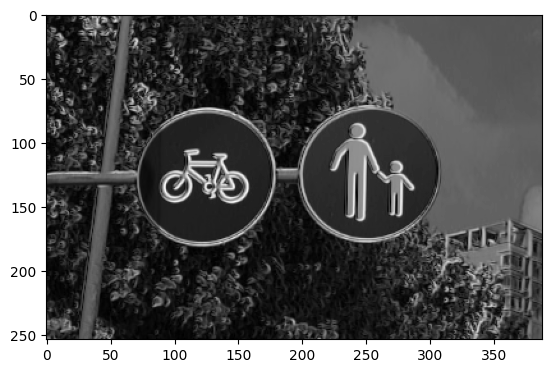

In [22]:
plt.imshow(G,cmap = 'gray')
plt.show()

$𝑅= det(𝑀)−𝑘*(trace(𝑀))^2$


$det(M)=I_x^2 * I_y^2 -(I_xI_y)^2$

$ trace(M) = I_x^2 + I_y^2$

In [28]:
Ixx = Ix * Ix
Iyy = Iy * Iy
Ixy = Ix * Iy

 这里使用了高斯平滑，目的可能是消除噪声，提高角点检测的鲁棒性

In [29]:
# Гауссово сглаживание
sigma = 1.5
Sxx = ndimage.gaussian_filter(Ixx,sigma)
Syy = ndimage.gaussian_filter(Iyy,sigma)
Sxy = ndimage.gaussian_filter(Ixy,sigma)

In [30]:
# Критерий Харриса
k = 0.05
R = (Sxx*Syy-Sxy**2) - k* (Sxx+Syy) ** 2
R

array([[ 0.00056026,  0.00119378,  0.00246253, ..., -0.09349272,
        -0.09440682, -0.09498563],
       [ 0.000797  ,  0.00169   ,  0.00328721, ..., -0.09442137,
        -0.09529458, -0.09584652],
       [ 0.00094508,  0.00190497,  0.00339562, ..., -0.09600225,
        -0.09665699, -0.09708565],
       ...,
       [ 0.10515865,  0.11041432,  0.09732922, ..., -0.09263726,
        -0.10673472, -0.11649697],
       [ 0.14101688,  0.13669776,  0.10417656, ..., -0.09793153,
        -0.11094809, -0.11950106],
       [ 0.15684078,  0.13443168,  0.07864163, ..., -0.10105911,
        -0.1138662 , -0.1222475 ]])

Порог используется для различения угловых точек и неугловых. Начальный порог устанавливается как 0,01 × R.max(), то есть 1% от максимального значения матрицы отклика R, однако для различных изображений следует применять разные пороги. Например, на данном изображении при использовании порога 0,01 × R.max() большая часть фона также будет распознана как угловые точки. Увеличение порога позволяет ограничить распознаваемые угловые точки областью указателей. Однако,часть указателя для велосипедов была хорошо распознана, но количество угловых точек в области пешеходов было невелико.

In [43]:
# Нормализация и пороговая обработка
R = (R / R.max()) * 255
threshold = 0.2 * R.max()
corners = np.argwhere(R>threshold)
corners

array([[  1,  40],
       [  2,  38],
       [  2,  39],
       ...,
       [227, 348],
       [227, 349],
       [227, 350]])

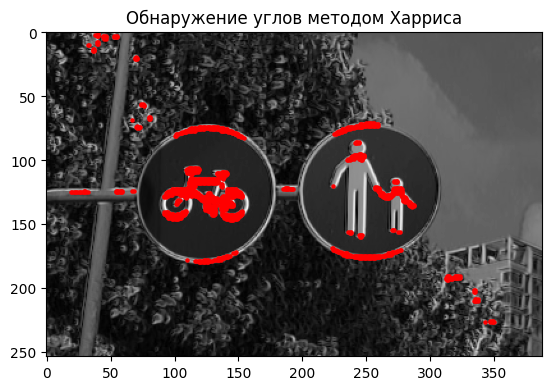

In [45]:
# Отображение результатов
plt.imshow(G, cmap='gray')
plt.scatter(corners[:, 1], corners[:, 0], s=5, c='red')
plt.title('Обнаружение углов методом Харриса')
plt.show()